In [1]:
# pip install citipy

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# weather_api_key

In [4]:
## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")
   


City Name: kondagaon, City ID: 1266216
City Name: geraldton, City ID: 2070998
City Name: taltal, City ID: 3870243
City Name: hobyo, City ID: 57000
City Name: ushuaia, City ID: 3833367
City Name: ca mau, City ID: 1586443
City Name: torbay, City ID: 6167817
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: hobart, City ID: 2163355
City Name: castro, City ID: 3466704
City Name: rikitea, City ID: 4030556
City Name: berlevag, City ID: 780687
City Name: pawa, City ID: 1694252
City Name: saint-philippe, City ID: 935215
City Name: faya, City ID: 110690
City Name: lompoc, City ID: 5367788
City Name: mogadishu, City ID: 53654
City Name: atuona, City ID: 4020109
That record does not exist, searching for next record...
City Name: albany, City ID: 5106841
City Name: reynosa, City ID: 3520339
City Name: bubaque, City ID: 2374583
City Name: bengkulu, City ID: 1649150
City Name: maceio, City ID: 3395981
City Name: tiksi, City I

City Name: te anau, City ID: 2181625
City Name: xiaoweizhai, City ID: 1789945
City Name: airai, City ID: 1651810
City Name: caravelas, City ID: 3466980
City Name: lasa, City ID: 3175096
City Name: calabozo, City ID: 3647444
City Name: sonari, City ID: 1255788
City Name: olden, City ID: 3135601
City Name: perevoz, City ID: 511287
City Name: saint-francois, City ID: 2980080
City Name: buraydah, City ID: 107304
City Name: lesogorsk, City ID: 1500609
City Name: ikwiriri, City ID: 159242
That record does not exist, searching for next record...
City Name: dhidhdhoo, City ID: 1337612
City Name: nortelandia, City ID: 3456248
City Name: parabel, City ID: 1495586
City Name: irbil, City ID: 95446
City Name: sinjar, City ID: 448149
City Name: hami, City ID: 1529484
City Name: valleyview, City ID: 6173220
City Name: chateaudun, City ID: 3026285
City Name: shimoda, City ID: 1852357
City Name: cabedelo, City ID: 3404558
City Name: bilma, City ID: 2446796
City Name: mahebourg, City ID: 934322
That rec

City Name: andenes, City ID: 3163146
City Name: tilichiki, City ID: 2120591
City Name: adrar, City ID: 2381972
City Name: george town, City ID: 1735106
City Name: ushibuka, City ID: 1849154
City Name: rajapur, City ID: 1258911
That record does not exist, searching for next record...
City Name: tabuk, City ID: 1684803
City Name: liverpool, City ID: 2644210
City Name: san rafael, City ID: 3836669
City Name: ghidigeni, City ID: 677407
City Name: gharghoda, City ID: 1271361
City Name: beidao, City ID: 1816751
That record does not exist, searching for next record...
City Name: north platte, City ID: 5697939
That record does not exist, searching for next record...
City Name: boa vista, City ID: 3664980
City Name: revda, City ID: 502011
City Name: santa maria, City ID: 3450083
City Name: ostrovnoy, City ID: 556268
City Name: doha, City ID: 290030
City Name: dubti, City ID: 338554
City Name: saint george, City ID: 5546220
City Name: oksfjord, City ID: 778362
City Name: alto parana, City ID: 34

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#create a dataframe
my_dict={"City":city_name_list,
        "Lat":lat_list,
        "Lng":lng_list,
        "Temperature": temp_list,
        "Humidity":humidity,
        "Clouds": clouds_list,
        "Wind Speed":wind_speed_list,
        "Country":country,
        "Date":date}

df= pd.DataFrame(my_dict)
df.head()

,City,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,Country,Date
0,Kondagaon,19.6000,81.6667,65.19,74,0,2.71,IN,1677962698
1,Geraldton,-28.7667,114.6000,63.01,74,0,9.22,AU,1677962513
2,Taltal,-25.4000,-70.4833,73.29,74,56,6.29,CL,1677962625
3,Hobyo,5.3505,48.5268,77.97,74,63,17.20,SO,1677962698
4,Ushuaia,-54.8000,-68.3000,46.06,74,75,20.71,AR,1677962263


In [24]:
#  Get the indices of cities that have humidity over 100%.
df['Humidity'].max()


74

In [25]:
# there are no temperatures over 100%

In [26]:
# df_humidity = df[(df["Humidity"] > 100)].index


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [38]:
# Export the filtered city data into a csv
df.to_csv("clean_data.csv,index=False, header=True")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

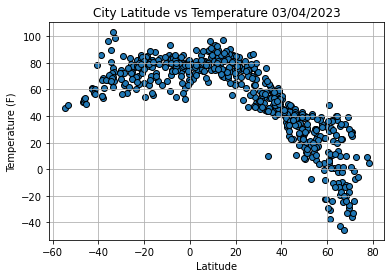

In [40]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

latitude = df["Lat"]
temperature = df["Temperature"]
plt.scatter(latitude,temperature,edgecolor="black", linewidth=1, marker="o",)
plt.title(f"City Latitude vs Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Latitude vsTemperature.png")

## Latitude vs. Humidity Plot

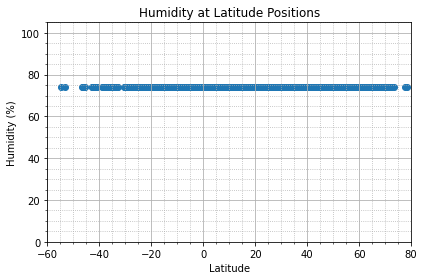

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = df["Lat"]
y_values = df["Humidity"]


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

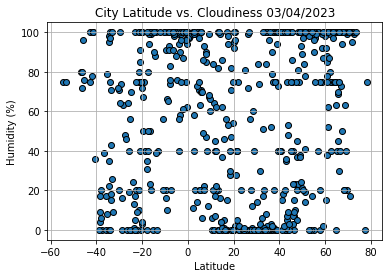

In [45]:
latitude = df["Lat"]
cloudiness = df["Clouds"]
plt.scatter(latitude,cloudiness,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

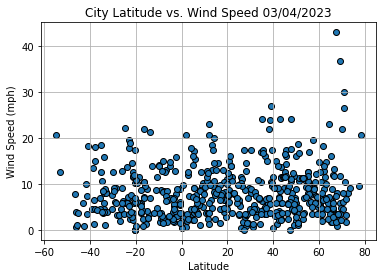

In [46]:
latitude = df["Lat"]
wind = df["Wind Speed"]
plt.scatter(latitude,wind,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude vs Wind Speed (mph).png")

## Linear Regression

In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df.loc[df["Lat"] > 0]
southern_hemisphere = df.loc[df["Lat"] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8887816622715452


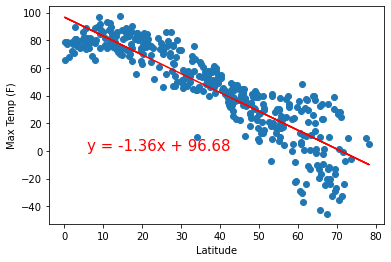

In [50]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4044669290570997


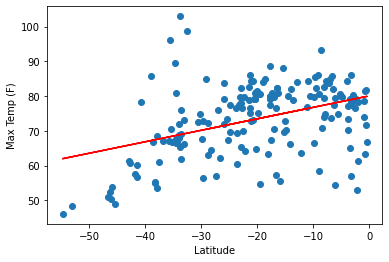

In [51]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\mtaba\bootcamp\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


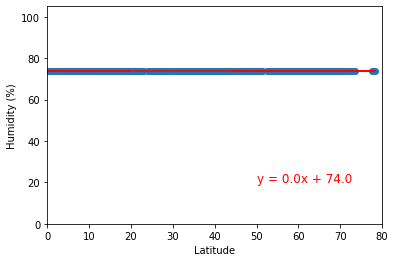

<Figure size 432x288 with 0 Axes>

In [71]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.show()
plt.savefig("lat_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


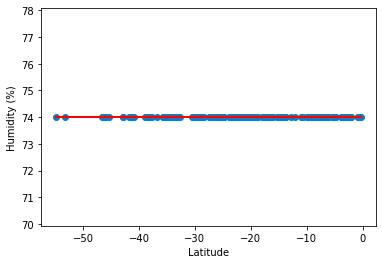

In [72]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.265686531877236


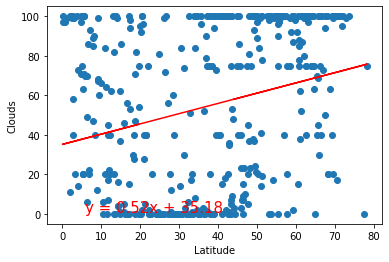

In [59]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3183521673735079


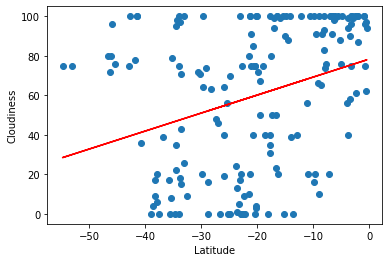

In [61]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07178726558363949


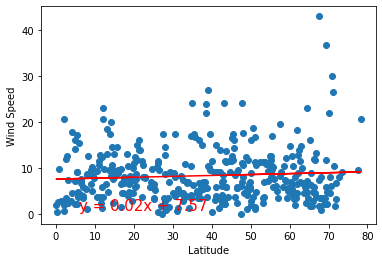

In [62]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09243108943464641


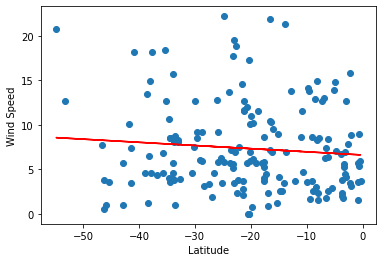

In [63]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()